In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("googleplaystore.csv")

In [4]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [6]:
df[~df["Category"].apply(lambda x: isinstance(x,str))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [7]:
df[df.Category.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [8]:
df_copy= df.copy()

In [9]:
df_copy.duplicated().sum()

np.int64(483)

In [10]:
df_copy=df_copy.drop_duplicates()

In [11]:
df_copy.duplicated().sum()

np.int64(0)

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
df_copy.shape

(10358, 13)

In [14]:
df.shape

(10841, 13)

In [15]:
df_copy.reset_index(drop =True,inplace =True)

In [16]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df_copy=df_copy.drop(df_copy.index[9990])

In [18]:
df_copy["Reviews"] = df_copy["Reviews"].astype(int)

In [19]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
df_copy.Reviews.dtype

dtype('int64')

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [22]:
df_copy["Size"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
10353    False
10354    False
10355    False
10356    False
10357    False
Name: Size, Length: 10357, dtype: bool

In [23]:
def size_process(item):
    if str(item)[-1]=="M":
        res= float(str(item).replace("M",""))
        res = res*1024
        return res
    elif str(item)[-1]=="k":
        res= float(str(item).replace("k",""))
        return res

    else: return str(np.nan)

In [24]:
size_process("14M")

14336.0

In [25]:
df_copy["Size"]= df_copy["Size"].apply(size_process)

In [26]:
df_copy["Size"].unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0, 'nan',
       9625.6, 15360.0, 10240.0, 1228.8, 26624.0, 8192.0, 8089.6, 57344.0,
       58368.0, 35840.0, 55296.0, 201.0, 3686.4, 5836.8, 8806.4, 2457.6,
       27648.0, 2560.0, 16384.0, 3481.6, 9113.6, 3993.6, 2969.6, 38912.0,
       32768.0, 5529.6, 18432.0, 1126.4, 2252.8, 4608.0, 10035.2, 53248.0,
       9216.0, 6860.8, 30720.0, 2662.4, 7270.4, 3788.8, 22528.0, 7577.6,
       6553.6, 3276.8, 8396.8, 10137.6, 5017.6, 9728.0, 5120.0, 6041.6,
       13312.0, 74752.0, 6963.2, 3584.0, 4096.0, 2355.2, 7372.8, 2150.4,
       43008.0, 7475.2, 9318.4, 56320.0, 23.0, 6656.0, 1536.0, 7680.0,
       52224.0, 41984.0, 49152.0, 8704.0, 47104.0, 8499.2, 4403.2, 4812.8,
       3379.2, 40960.0, 7987.2, 9011.2, 6758.4, 5222.4, 

In [27]:
df_copy["Size"].dtype


dtype('O')

In [28]:
df_copy.Size=df_copy.Size.astype("float")

In [29]:
df_copy.Size.dtype

dtype('float64')

In [30]:
df_copy["Installs"]

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10353         5,000+
10354           100+
10355         1,000+
10356         1,000+
10357    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [31]:
df_copy["Installs"]=df_copy["Installs"].str.replace("+","").str.replace(",","")

In [32]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [33]:
df_copy.Installs=df_copy.Installs.astype("int")

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [35]:
def remove_sign(item):
    if str(item)[0] == "$":      # == for comparison
        res = str(item).replace("$", "")
        return res
    return item   

In [36]:
df_copy["Price"]=df_copy["Price"].apply(remove_sign)

In [37]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [38]:
df_copy["Price"]=df_copy["Price"].replace("Everyone",0)

In [39]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [40]:
df_copy["Price"]=df_copy["Price"].astype("float")

In [41]:
df_copy["Price"].dtype

dtype('float64')

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [43]:
df_copy["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10353       July 25, 2017
10354        July 6, 2018
10355    January 20, 2017
10356    January 19, 2015
10357       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [44]:
df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])

In [45]:
df_copy["Last Updated"].unique()


<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [46]:
df_copy["Last Updated"] = pd.to_datetime(df_copy["Last Updated"], format="mixed", errors="coerce")


In [47]:
invalid_mask = pd.to_datetime(df_copy["Last Updated"], format="mixed", errors="coerce").isna()

# Invalid datetime values
invalid_values = df_copy.loc[invalid_mask, "Last Updated"]

print(invalid_values)


Series([], Name: Last Updated, dtype: datetime64[ns])


In [48]:
df_copy.iloc[9990,]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                               4198.4
Installs                         10000000
Type                                 Free
Price                                 0.0
Content Rating                   Everyone
Genres                              Tools
Last Updated          2018-08-07 00:00:00
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 9991, dtype: object

In [49]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int64         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [50]:
df_copy = df_copy.dropna(subset=["Last Updated"])


In [51]:
df_copy["Last Updated"].isna().sum()

np.int64(0)

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10357 non-null  object        
 1   Category        10357 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10357 non-null  int64         
 4   Size            8831 non-null   float64       
 5   Installs        10357 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price           10357 non-null  float64       
 8   Content Rating  10357 non-null  object        
 9   Genres          10357 non-null  object        
 10  Last Updated    10357 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android Ver     10355 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [53]:
 df_copy["Last Updated"].dt

In [54]:
df_copy["Day"] = df_copy["Last Updated"].dt.day

In [55]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19


In [56]:
df_copy["Month"] = df_copy["Last Updated"].dt.month
df_copy["Year"] = df_copy["Last Updated"].dt.year

In [57]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [58]:
df_copy.drop("Last Updated",axis =1 , inplace= True)

In [59]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,25,7,2017
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,1.0,4.1 and up,6,7,2018
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9728.0,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,20,1,2017
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,19,1,2015


In [60]:
df_copy["Android Ver"].nunique()

33

In [61]:
df_copy["Android Ver"]=df_copy["Android Ver"].str.replace("and up","").str.replace("Varies with device","0")

In [62]:
df_copy["Android Ver"].nunique()
#df_copy["Android Ver"].shape

33

In [63]:
df_copy["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '0', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4W ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [64]:
df_copy["Android Ver"].shape

(10357,)

In [65]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Current Ver     10349 non-null  object 
 11  Android Ver     10355 non-null  object 
 12  Day             10357 non-null  int32  
 13  Month           10357 non-null  int32  
 14  Year            10357 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.1+ MB


In [68]:
df_copy["Android Ver"].replace("4.4W ","4.4",inplace=True)


In [69]:
df_copy["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '0', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '5.1 ', '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '4.4', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 ', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [70]:
def clean_android_version(val):
    if isinstance(val, str):
        # sirf dash ke pehle ka part lo
        val = val.split('-')[0].strip()
    return val

df_copy["Android Ver"] = df_copy["Android Ver"].apply(clean_android_version)



In [71]:
df_copy["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '0',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1', nan, '1.0'],
      dtype=object)

In [74]:
df_copy.dropna(subset=["Android Ver"], inplace=True)


In [75]:
df_copy["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '0',
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1', '1.0'], dtype=object)

In [76]:
df_copy["Android Ver"] = (
    df_copy["Android Ver"]
    .astype(str)                # ensure sab string ho
    .str.split('-').str[0]       # dash se split, first part lelo
    .str.strip()                 # extra space hatao
    .str[:3]                     # sirf 3 char (jaise 4.0, 5.1) rakho
)


In [81]:
df_copy["Android Ver"].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [78]:
df_copy["Android Ver"].replace("0",np.nan,inplace =True)

In [80]:
df_copy.dropna(subset=["Android Ver"], inplace=True)

In [85]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 10355
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9134 non-null   object 
 1   Category        9134 non-null   object 
 2   Rating          7712 non-null   float64
 3   Reviews         9134 non-null   int64  
 4   Size            8776 non-null   float64
 5   Installs        9134 non-null   int64  
 6   Type            9134 non-null   object 
 7   Price           9134 non-null   float64
 8   Content Rating  9134 non-null   object 
 9   Genres          9134 non-null   object 
 10  Current Ver     9126 non-null   object 
 11  Android Ver     9134 non-null   object 
 12  Day             9134 non-null   int32  
 13  Month           9134 non-null   int32  
 14  Year            9134 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.0+ MB


In [86]:
df_copy["Android Ver"]=df_copy["Android Ver"].astype("float")

In [87]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 10355
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9134 non-null   object 
 1   Category        9134 non-null   object 
 2   Rating          7712 non-null   float64
 3   Reviews         9134 non-null   int64  
 4   Size            8776 non-null   float64
 5   Installs        9134 non-null   int64  
 6   Type            9134 non-null   object 
 7   Price           9134 non-null   float64
 8   Content Rating  9134 non-null   object 
 9   Genres          9134 non-null   object 
 10  Current Ver     9126 non-null   object 
 11  Android Ver     9134 non-null   float64
 12  Day             9134 non-null   int32  
 13  Month           9134 non-null   int32  
 14  Year            9134 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(6)
memory usage: 1.0+ MB


In [89]:
a="4.4w"
a.replace("w",'')

'4.4'

In [101]:
if str(a)[-1]=="w":
        res= float(str(a).replace("w",""))
        print(str(res))
print(type(res))

4.4
<class 'float'>


In [98]:
def remove(a):
    if str(a)[-1]=="w":
        res= float(str(a).replace("w",""))
        return(res)

remove(a)

4.4

In [102]:
df_copy[df_copy.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
260,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,Varies with device,4.0,26,2,2018
261,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35840.0,100000000,Free,0.0,Everyone,Business,9.7.14188,4.1,2,8,2018
349,imo free video calls and chat,COMMUNICATION,4.3,4785988,11264.0,500000000,Free,0.0,Everyone,Communication,9.8.000000010501,4.0,8,6,2018
372,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36893,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
374,Google Allo,COMMUNICATION,4.3,346980,NaN,10000000,Free,0.0,Everyone,Communication,Varies with device,4.1,23,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10164,Podcast App: Free & Offline Podcasts by Player FM,NEWS_AND_MAGAZINES,4.6,66407,19456.0,1000000,Free,0.0,Teen,News & Magazines,4.1.0.72,4.0,25,7,2018
10233,FarmersOnly Dating,DATING,3.0,1145,1433.6,100000,Free,0.0,Mature 17+,Dating,2.2,4.0,25,2,2016
10238,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4096.0,1000000,Free,0.0,Everyone,Communication,5.2,5.0,6,7,2018
10248,FP Notebook,MEDICAL,4.5,410,61440.0,50000,Free,0.0,Everyone,Medical,2.1.0.372,4.4,24,3,2018


In [103]:
df_copy=df_copy.drop_duplicates(subset =["App"],keep = "first")

In [104]:
df_copy[df_copy.duplicated("App")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year


# Exporatory Data Analysis

In [109]:
categorical_features =[features for features in df_copy.columns if df_copy[features].dtype =="O"]

In [108]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Day', 'Month', 'Year'],
      dtype='object')

In [110]:
categorical_features

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver']

In [112]:
#numerical columns
numerical_features =[features for features in df_copy.columns if df_copy[features].dtype !="O"]

In [113]:
numerical_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Android Ver',
 'Day',
 'Month',
 'Year']

In [114]:
df_copy["Type"].value_counts(normalize =True)*100

Type
Free    92.005998
Paid     7.994002
Name: proportion, dtype: float64

<Axes: xlabel='Type', ylabel='count'>

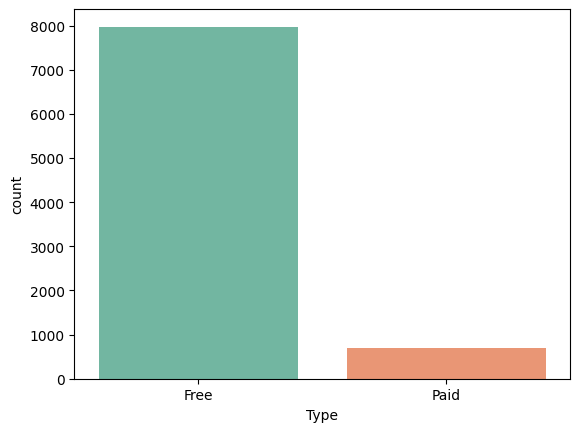

In [116]:
sns.countplot(x="Type", data=df_copy, palette="Set2")

<Axes: xlabel='Content Rating', ylabel='count'>

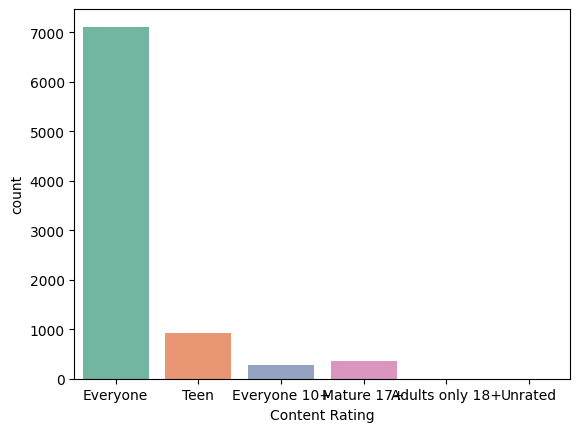

In [117]:
sns.countplot(x="Content Rating", data=df_copy, palette="Set2")

<Axes: xlabel='Price', ylabel='Density'>

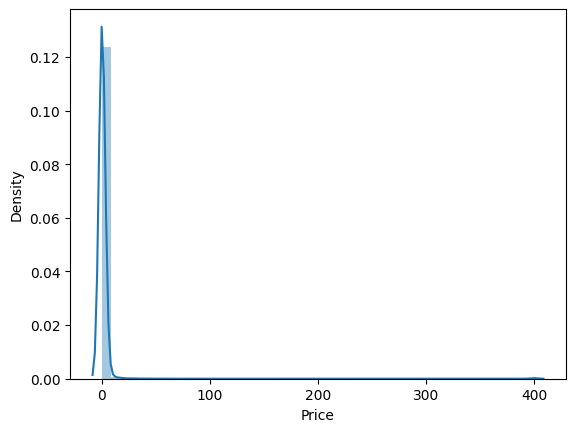

In [118]:
sns.distplot(df_copy["Price"],kde =True)

<Axes: xlabel='Rating', ylabel='Density'>

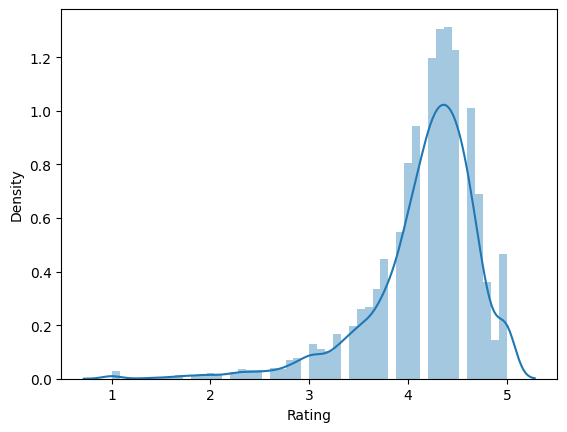

In [119]:
sns.distplot(df_copy["Rating"],kde =True)

<Axes: xlabel='Rating', ylabel='Density'>

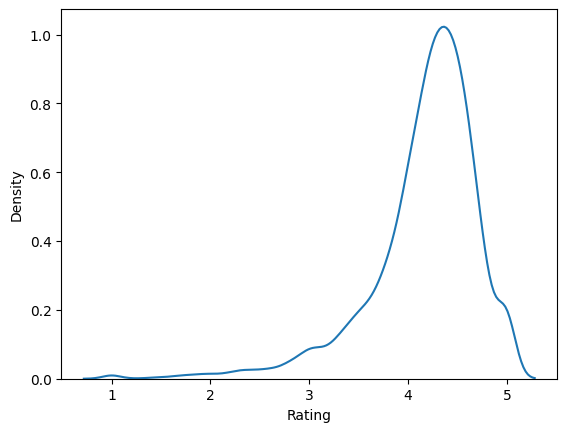

In [120]:
sns.kdeplot(df_copy["Rating"])

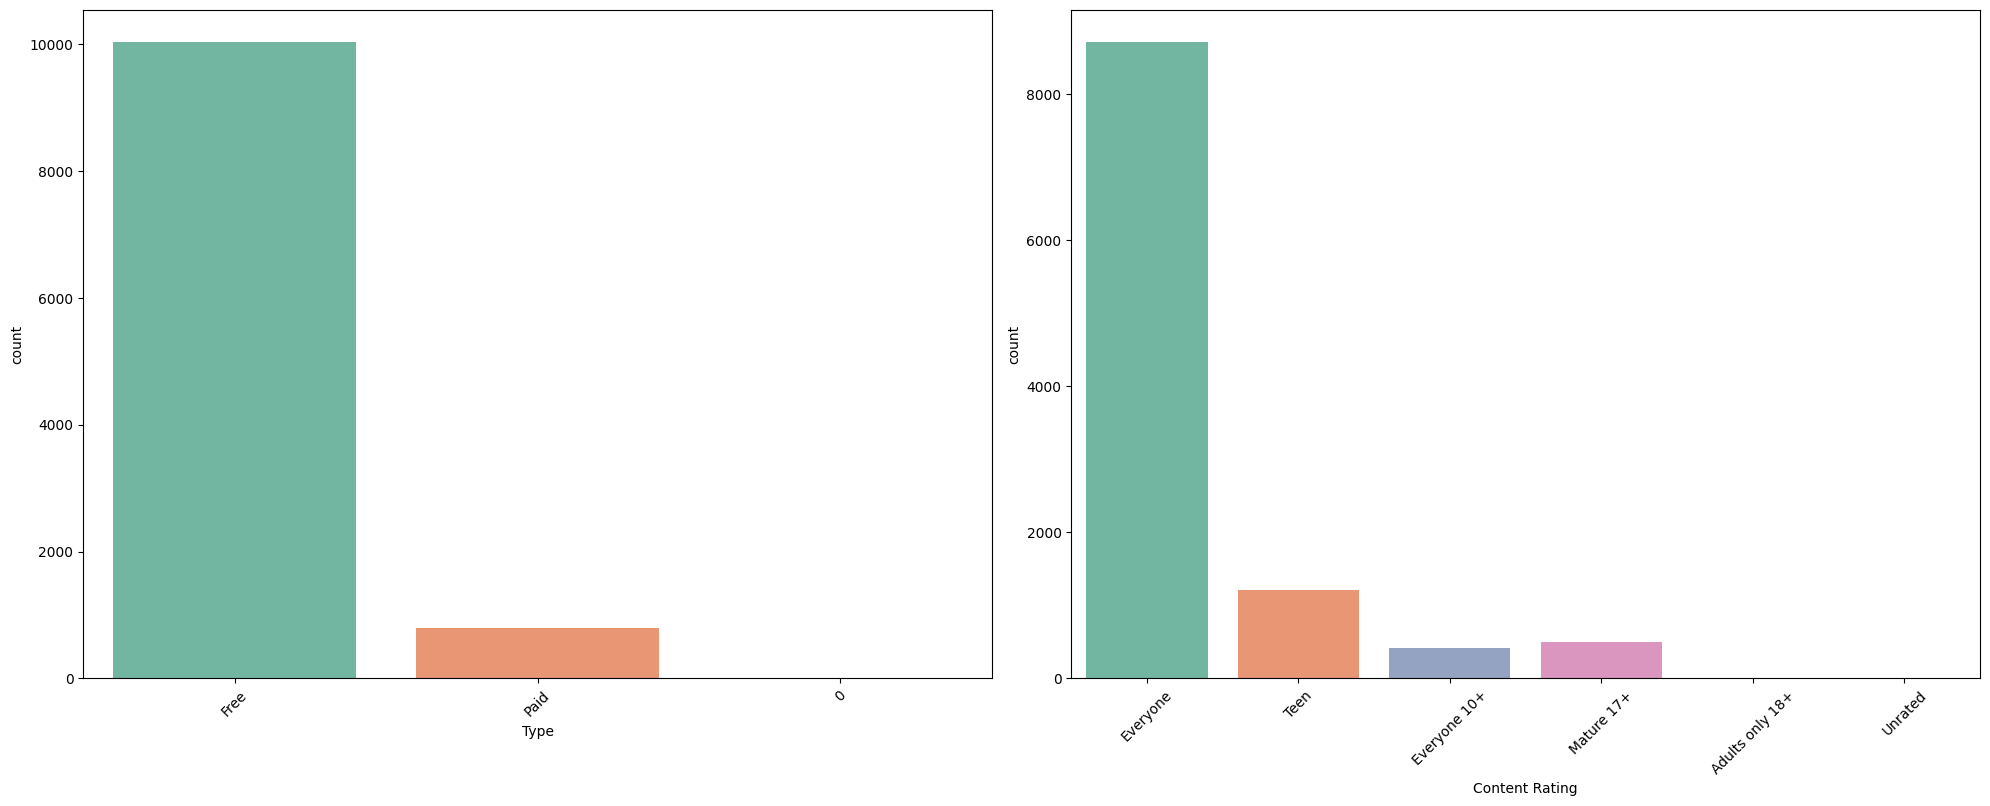

In [121]:
plt.figure(figsize =(20,15))
category =["Type","Content Rating"]
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]],palette ="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

<Axes: ylabel='count'>

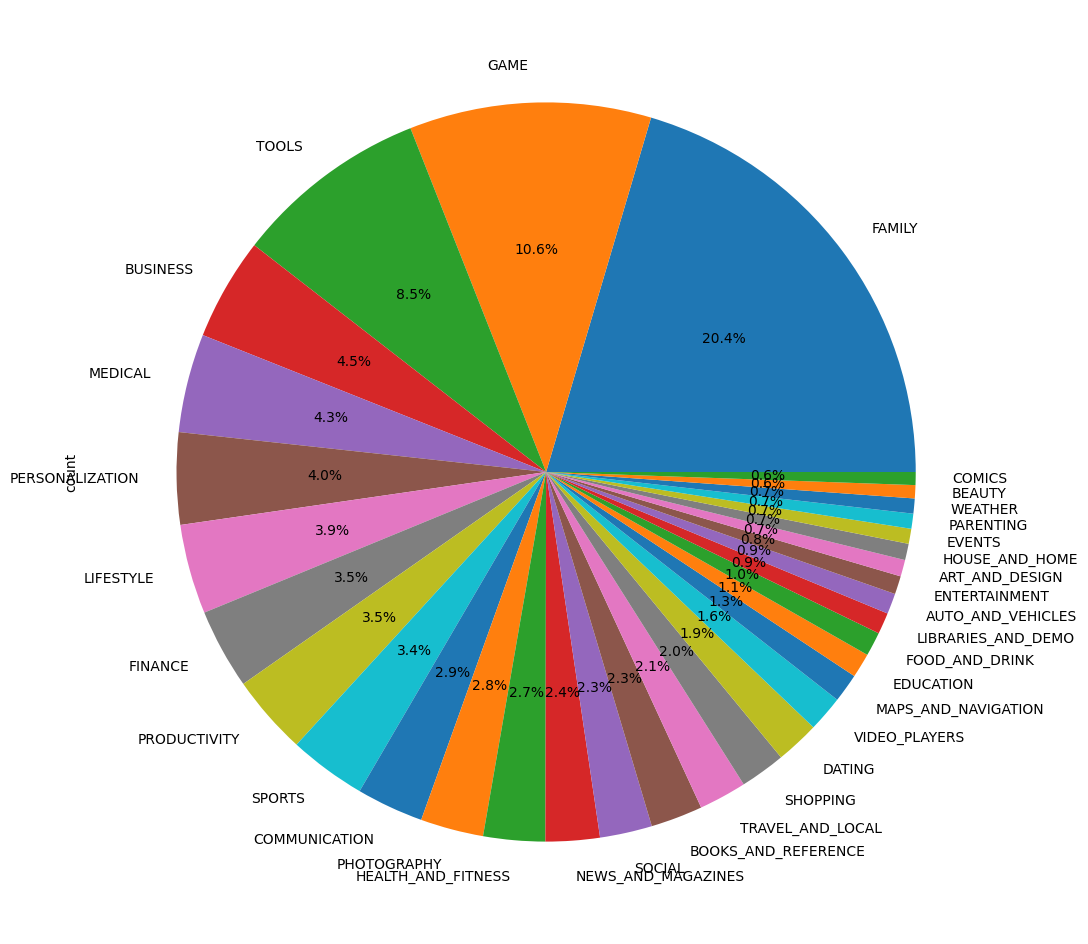

In [129]:
df_copy["Category"].value_counts().plot.pie(y=df["Category"],figsize =(12,12),autopct = '%1.1f%%')

In [131]:
df_copy["Category"].value_counts(normalize =True)*100


Category
FAMILY                 20.417580
GAME                   10.566386
TOOLS                   8.501557
BUSINESS                4.475718
MEDICAL                 4.314223
PERSONALIZATION         4.014304
LIFESTYLE               3.922021
FINANCE                 3.506748
PRODUCTIVITY            3.483677
SPORTS                  3.379859
COMMUNICATION           2.929980
PHOTOGRAPHY             2.756950
HEALTH_AND_FITNESS      2.699273
NEWS_AND_MAGAZINES      2.364748
SOCIAL                  2.284000
BOOKS_AND_REFERENCE     2.272465
TRAVEL_AND_LOCAL        2.087899
SHOPPING                1.984081
DATING                  1.903334
VIDEO_PLAYERS           1.568808
MAPS_AND_NAVIGATION     1.257354
EDUCATION               1.072788
FOOD_AND_DRINK          1.049717
LIBRARIES_AND_DEMO      0.934364
AUTO_AND_VEHICLES       0.899758
ENTERTAINMENT           0.795940
ART_AND_DESIGN          0.726727
HOUSE_AND_HOME          0.715192
EVENTS                  0.657515
PARENTING               0.657515
W

In [132]:
#which is the top 10 most popular category 
df_copy["Category"].value_counts()[:10]

Category
FAMILY             1770
GAME                916
TOOLS               737
BUSINESS            388
MEDICAL             374
PERSONALIZATION     348
LIFESTYLE           340
FINANCE             304
PRODUCTIVITY        302
SPORTS              293
Name: count, dtype: int64

In [133]:
cat =df_copy["Category"].value_counts()[:10]

In [134]:
category = cat.reset_index()
category

,Category,count
0,FAMILY,1770
1,GAME,916
2,TOOLS,737
3,BUSINESS,388
4,MEDICAL,374
5,PERSONALIZATION,348
6,LIFESTYLE,340
7,FINANCE,304
8,PRODUCTIVITY,302
9,SPORTS,293


In [136]:
category.columns =["Group","Counts"]
category

,Group,Counts
0,FAMILY,1770
1,GAME,916
2,TOOLS,737
3,BUSINESS,388
4,MEDICAL,374
5,PERSONALIZATION,348
6,LIFESTYLE,340
7,FINANCE,304
8,PRODUCTIVITY,302
9,SPORTS,293


<Axes: xlabel='Group', ylabel='Counts'>

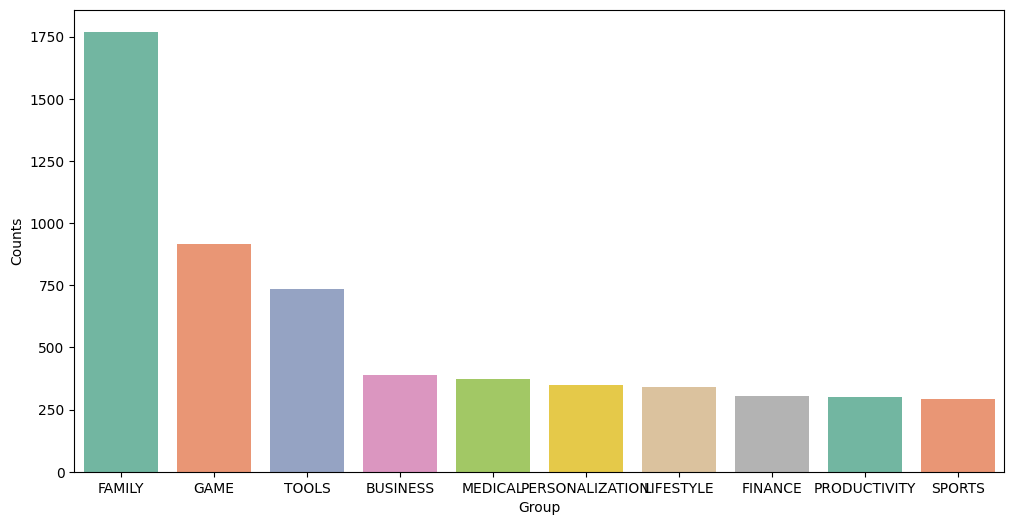

In [142]:
plt.figure(figsize=(12, 6))
sns.barplot(category,x= category['Group'],y=category['Counts'],palette ="Set2")

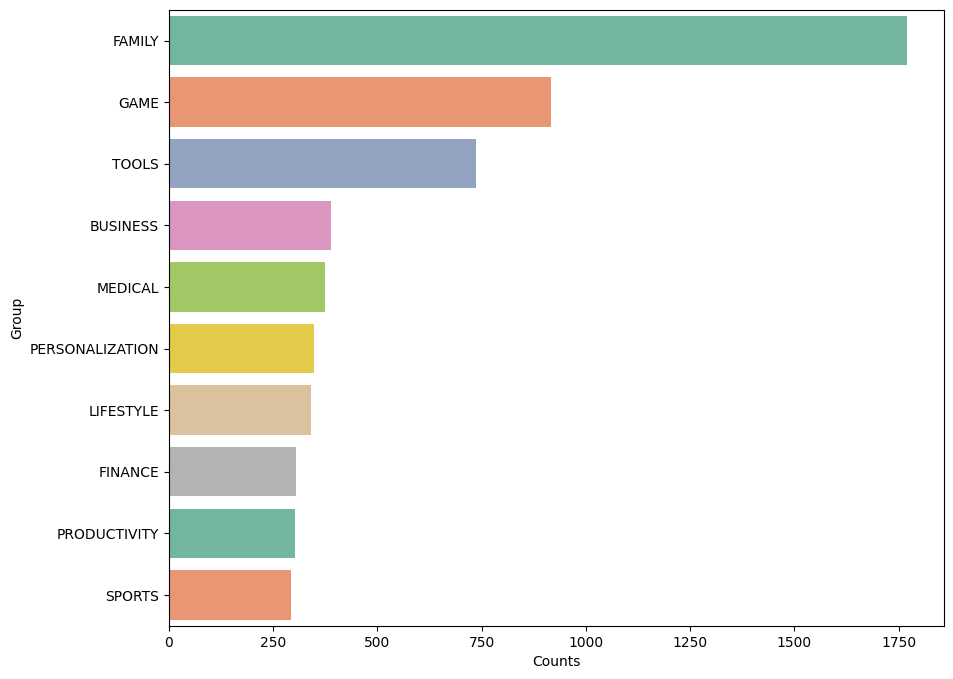

In [139]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Group', x='Counts', data=category, palette="Set2")
plt.show()

In [146]:
df_copy.groupby(["Category"])["Installs"].sum().sort_values(ascending = False).reset_index()

,Category,Installs
0,GAME,13087064264
1,FAMILY,4005407335
2,TOOLS,3006154815
3,COMMUNICATION,2653153051
4,PHOTOGRAPHY,2036997655
5,PRODUCTIVITY,1748513744
6,NEWS_AND_MAGAZINES,1182106760
7,VIDEO_PLAYERS,964677720
8,SPORTS,892454498
9,PERSONALIZATION,855068772


<Axes: ylabel='Rating'>

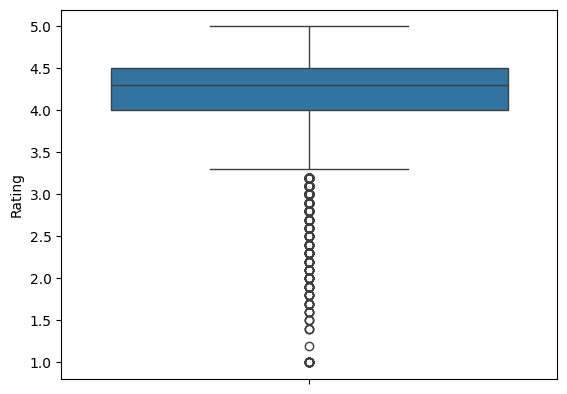

In [147]:
sns.boxplot(df_copy["Rating"])

In [171]:
df_copy["Category"].value_counts()

Category
FAMILY                 1770
GAME                    916
TOOLS                   737
BUSINESS                388
MEDICAL                 374
PERSONALIZATION         348
LIFESTYLE               340
FINANCE                 304
PRODUCTIVITY            302
SPORTS                  293
COMMUNICATION           254
PHOTOGRAPHY             239
HEALTH_AND_FITNESS      234
NEWS_AND_MAGAZINES      205
SOCIAL                  198
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        181
SHOPPING                172
DATING                  165
VIDEO_PLAYERS           136
MAPS_AND_NAVIGATION     109
EDUCATION                93
FOOD_AND_DRINK           91
LIBRARIES_AND_DEMO       81
AUTO_AND_VEHICLES        78
ENTERTAINMENT            69
ART_AND_DESIGN           63
HOUSE_AND_HOME           62
EVENTS                   57
PARENTING                57
WEATHER                  57
BEAUTY                   50
COMICS                   49
Name: count, dtype: int64

In [156]:
print(df_copy.columns.tolist())

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 'Day', 'Month', 'Year']


In [164]:
games_df = df_copy[df_copy["Category"] == "GAME"]
games_df.groupby(["App"])["Installs"].sum().sort_values(ascending =False).head(5)

App
Subway Surfers      1000000000
Temple Run 2         500000000
Pou                  500000000
My Talking Tom       500000000
Candy Crush Saga     500000000
Name: Installs, dtype: int64

In [163]:
games_df = df_copy[df_copy["Category"] == "GAME"]
top_games = (
    games_df.groupby("App")["Installs"]  # Installs ka sum chahiye
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print(top_games)

App
Subway Surfers      1000000000
Temple Run 2         500000000
Pou                  500000000
My Talking Tom       500000000
Candy Crush Saga     500000000
Name: Installs, dtype: int64


In [167]:
df_copy.groupby(["Category","Type"])["Installs"].sum().sort_values(ascending =False).head(5)

Category       Type
GAME           Free    13066164300
FAMILY         Free     3995075671
TOOLS          Free     3005708474
COMMUNICATION  Free     2652804001
PHOTOGRAPHY    Free     2035268915
Name: Installs, dtype: int64

In [168]:
df_copy.groupby(["Category","App"])["Reviews"].sum().sort_values(ascending =False).head(5)

Category       App                                        
GAME           Clash of Clans                                 44891723
               Subway Surfers                                 27722264
               Clash Royale                                   23133508
               Candy Crush Saga                               22426677
COMMUNICATION  UC Browser - Fast Download Private & Secure    17712922
Name: Reviews, dtype: int64

In [169]:
top_reviews = (
    df_copy.groupby(["Category", "App"])["Reviews"]
    .sum()
    .sort_values(ascending=False)
    .head(10)  # top 10 combinations
)

print(top_reviews)


Category       App                                               
GAME           Clash of Clans                                        44891723
               Subway Surfers                                        27722264
               Clash Royale                                          23133508
               Candy Crush Saga                                      22426677
COMMUNICATION  UC Browser - Fast Download Private & Secure           17712922
GAME           My Talking Tom                                        14891223
               8 Ball Pool                                           14198297
TOOLS          DU Battery Saver - Battery Charger & Battery Life     13479633
COMMUNICATION  BBM - Free Calls & Messages                           12842860
TOOLS          Cache Cleaner-DU Speed Booster (booster & cleaner)    12759663
Name: Reviews, dtype: int64
